Fire Response Time Analysis - EDA & Preprocessing



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/2019_Fire_Response_Time_Analysis.csv"
df = pd.read_csv(file_path)

# Display structure
print("Shape before cleaning:", df.shape)
df.head()


Shape before cleaning: (22, 15)


,_id,Response Times,YTD,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,< 1:00,237.0,10.0,24.0,21.0,27.0,22.0,21.0,26.0,28.0,18.0,19.0,21.0,NaN
2,3,1:00 to 1:59,891.0,75.0,91.0,77.0,92.0,79.0,74.0,70.0,91.0,95.0,72.0,75.0,NaN
3,4,2:00 to 2:59,1238.0,118.0,126.0,84.0,125.0,104.0,93.0,94.0,118.0,125.0,140.0,111.0,NaN
4,5,3:00 to 3:59,981.0,104.0,96.0,89.0,85.0,76.0,74.0,63.0,102.0,101.0,112.0,79.0,NaN


In [ ]:
# Remove first empty row (if Response Times is NaN)
df = df[df["Response Times"].notna()].reset_index(drop=True)

# Drop completely empty column (Dec)
df = df.drop(columns=["Dec"])

# Drop _id column
df = df.drop(columns=["_id"])

# Clean up 'Response Times' text
df["Response Times"] = (
    df["Response Times"]
    .str.replace("<", "Under", regex=False)
    .str.replace("to", "-", regex=False)
    .str.strip()
)

# Fill missing numeric values with 0 (optional)
df = df.fillna(0)

print("Shape after cleaning:", df.shape)
df.head()


Shape after cleaning: (21, 13)


,Response Times,YTD,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,Under 1:00,237.0,10.0,24.0,21.0,27.0,22.0,21.0,26.0,28.0,18.0,19.0,21.0
1,1:00 - 1:59,891.0,75.0,91.0,77.0,92.0,79.0,74.0,70.0,91.0,95.0,72.0,75.0
2,2:00 - 2:59,1238.0,118.0,126.0,84.0,125.0,104.0,93.0,94.0,118.0,125.0,140.0,111.0
3,3:00 - 3:59,981.0,104.0,96.0,89.0,85.0,76.0,74.0,63.0,102.0,101.0,112.0,79.0
4,4:00 - 4:59,585.0,54.0,51.0,35.0,49.0,58.0,56.0,56.0,54.0,58.0,61.0,53.0


In [ ]:
# Check for missing values
print("\nMissing values:\n", df.isna().sum())

# Data types
print("\nData types:\n", df.dtypes)

# Descriptive statistics
df.describe().T



Missing values:
 Response Times    0
YTD               0
Jan               0
Feb               0
Mar               0
Apr               0
May               0
Jun               0
Jul               0
Aug               0
Sep               0
Oct               0
Nov               0
dtype: int64

Data types:
 Response Times     object
YTD               float64
Jan               float64
Feb               float64
Mar               float64
Apr               float64
May               float64
Jun               float64
Jul               float64
Aug               float64
Sep               float64
Oct               float64
Nov               float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
YTD,21.0,225.333333,374.059131,0.0,6.0,17.0,237.0,1238.0
Jan,21.0,20.809524,36.313385,0.0,0.0,1.0,17.0,118.0
Feb,21.0,21.571429,37.509427,0.0,0.0,1.0,24.0,126.0
Mar,21.0,18.142857,29.252839,0.0,0.0,3.0,21.0,89.0
Apr,21.0,21.238095,36.072018,0.0,1.0,2.0,25.0,125.0
May,21.0,20.095238,31.821227,0.0,0.0,2.0,22.0,104.0
Jun,21.0,18.904762,29.393715,0.0,1.0,2.0,21.0,93.0
Jul,21.0,17.761905,28.310607,0.0,0.0,2.0,26.0,94.0
Aug,21.0,22.190476,37.085872,0.0,0.0,1.0,28.0,118.0
Sep,21.0,22.761905,38.529086,0.0,0.0,2.0,24.0,125.0


Univariate, Bivariate, Multivariate, One Hot Encoder Analysis


               YTD         Jan         Feb        Mar         Apr         May  \
count    21.000000   21.000000   21.000000  21.000000   21.000000   21.000000   
mean    225.333333   20.809524   21.571429  18.142857   21.238095   20.095238   
std     374.059131   36.313385   37.509427  29.252839   36.072018   31.821227   
min       0.000000    0.000000    0.000000   0.000000    0.000000    0.000000   
25%       6.000000    0.000000    0.000000   0.000000    1.000000    0.000000   
50%      17.000000    1.000000    1.000000   3.000000    2.000000    2.000000   
75%     237.000000   17.000000   24.000000  21.000000   25.000000   22.000000   
max    1238.000000  118.000000  126.000000  89.000000  125.000000  104.000000   

             Jun        Jul         Aug         Sep         Oct         Nov  
count  21.000000  21.000000   21.000000   21.000000   21.000000   21.000000  
mean   18.904762  17.761905   22.190476   22.761905   22.904762   18.952381  
std    29.393715  28.310607   37.085

<Figure size 1400x800 with 0 Axes>

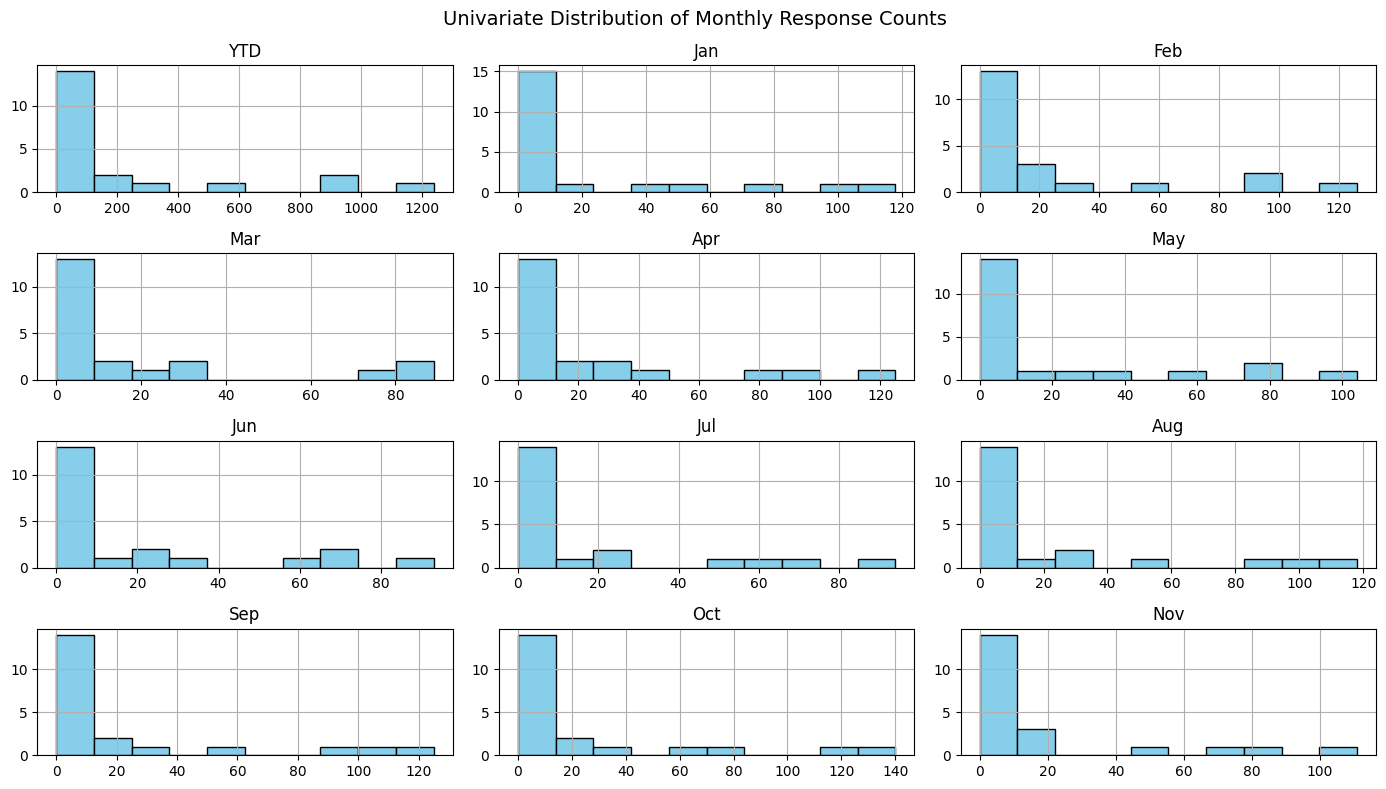

/tmp/ipython-input-446902737.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Response Times', data=df, palette='viridis')


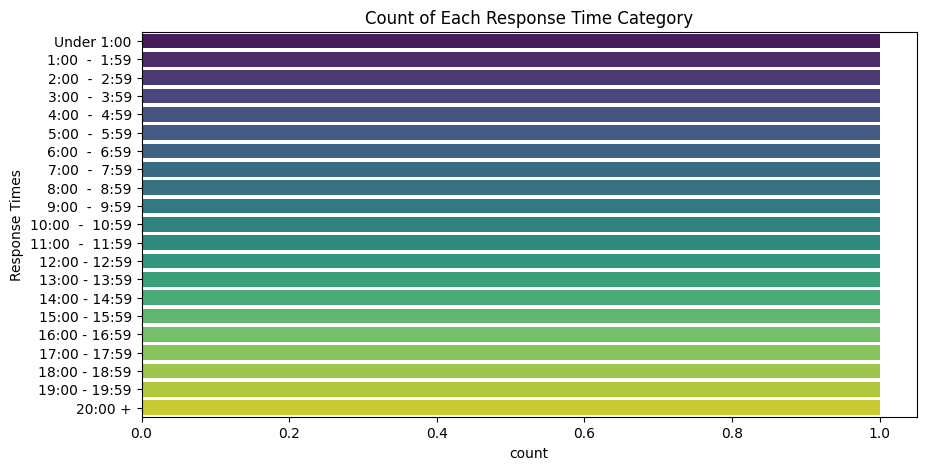

In [ ]:
# --- Summary statistics ---
print(df.describe())

# --- Numeric columns histograms ---
numeric_cols = ['YTD','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']

plt.figure(figsize=(14,8))
df[numeric_cols].hist(bins=10, figsize=(14,8), color='skyblue', edgecolor='black')
plt.suptitle("Univariate Distribution of Monthly Response Counts", fontsize=14)
plt.tight_layout()
plt.show()

# --- Categorical column distribution ---
plt.figure(figsize=(10,5))
sns.countplot(y='Response Times', data=df, palette='viridis')
plt.title("Count of Each Response Time Category")
plt.show()


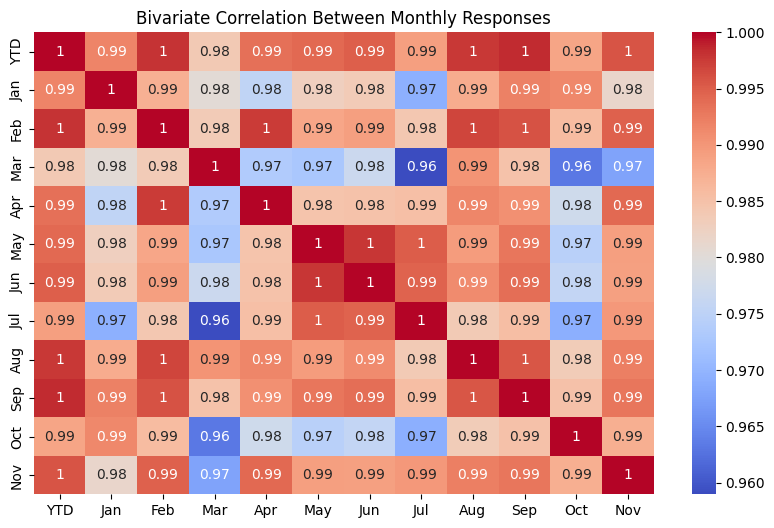

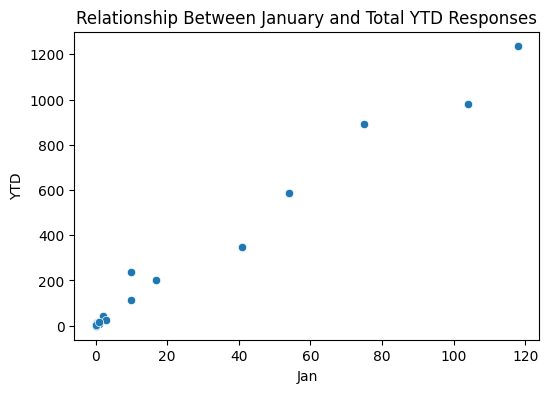

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Bivariate Correlation Between Monthly Responses")
plt.show()

# Example: Jan vs YTD
plt.figure(figsize=(6,4))
sns.scatterplot(x='Jan', y='YTD', data=df)
plt.title("Relationship Between January and Total YTD Responses")
plt.show()


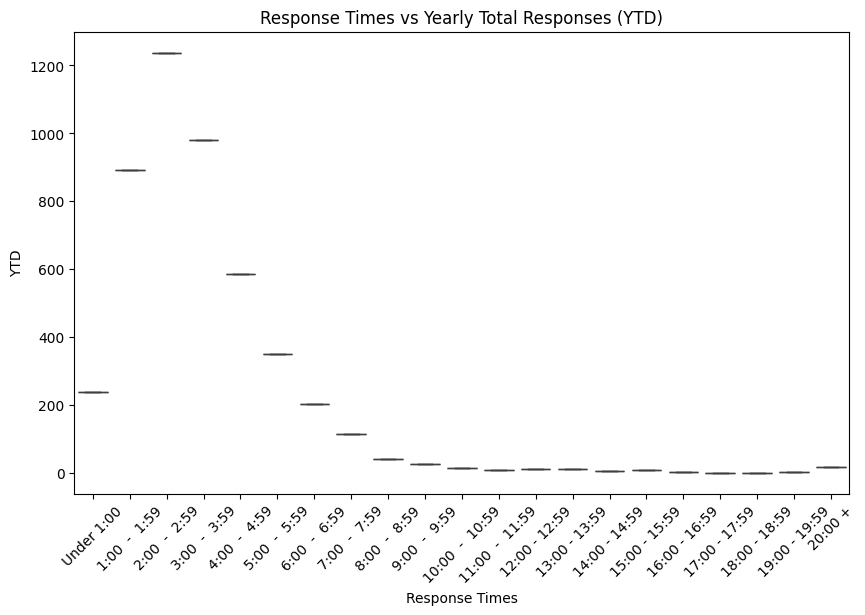

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Response Times', y='YTD', data=df)
plt.xticks(rotation=45)
plt.title("Response Times vs Yearly Total Responses (YTD)")
plt.show()


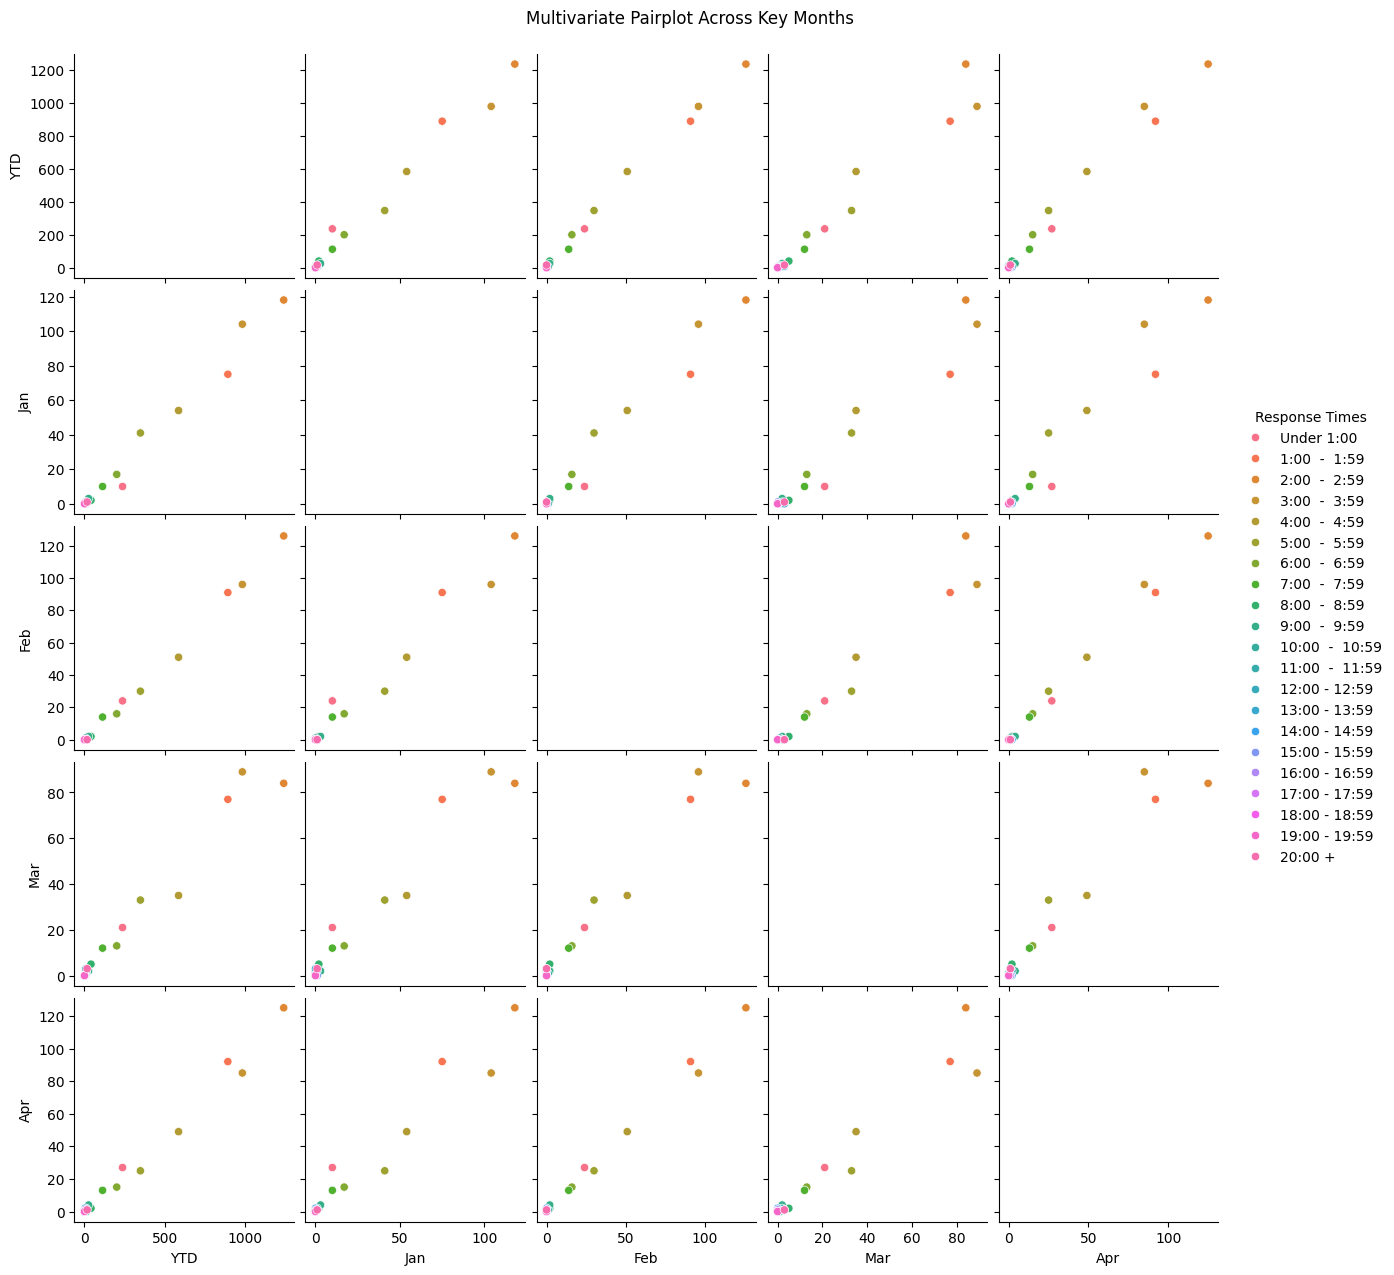

In [ ]:
# Pairplot for top months + YTD
sns.pairplot(df[['YTD','Jan','Feb','Mar','Apr','Response Times']], hue='Response Times', diag_kind='kde')
plt.suptitle("Multivariate Pairplot Across Key Months", y=1.02)
plt.show()




In [ ]:
# Convert wide format (Jan–Nov) to long format
df_long = df.melt(id_vars=["Response Times", "YTD"],
                  var_name="Month", value_name="Count")

# Sort months correctly
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
df_long["Month"] = pd.Categorical(df_long["Month"], categories=month_order, ordered=True)
df_long = df_long.sort_values(["Response Times", "Month"]).reset_index(drop=True)

df_long.head()


,Response Times,YTD,Month,Count
0,10:00 - 10:59,13.0,Jan,0.0
1,10:00 - 10:59,13.0,Feb,0.0
2,10:00 - 10:59,13.0,Mar,1.0
3,10:00 - 10:59,13.0,Apr,0.0
4,10:00 - 10:59,13.0,May,3.0


/tmp/ipython-input-562165751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Response Times", y="YTD", data=df, palette="viridis")


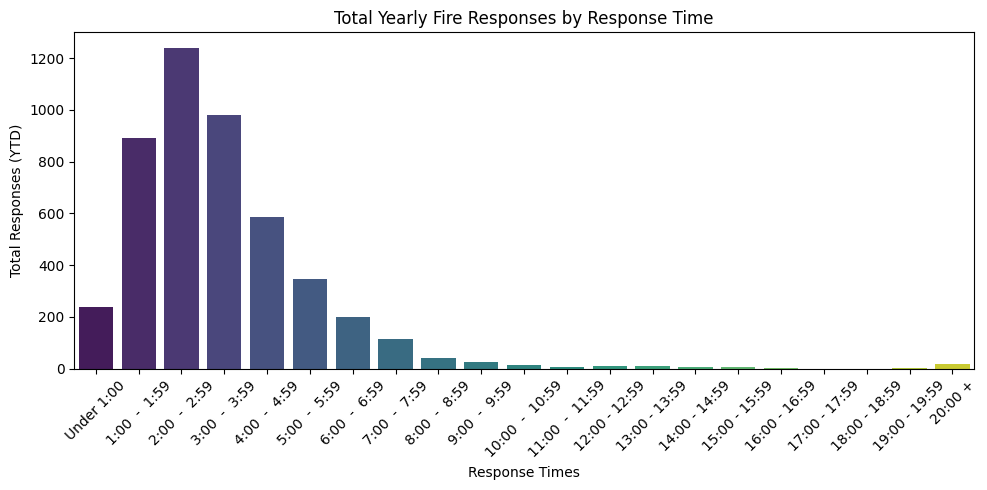

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Response Times", y="YTD", data=df, palette="viridis")
plt.title("Total Yearly Fire Responses by Response Time")
plt.xticks(rotation=45)
plt.ylabel("Total Responses (YTD)")
plt.tight_layout()
plt.show()


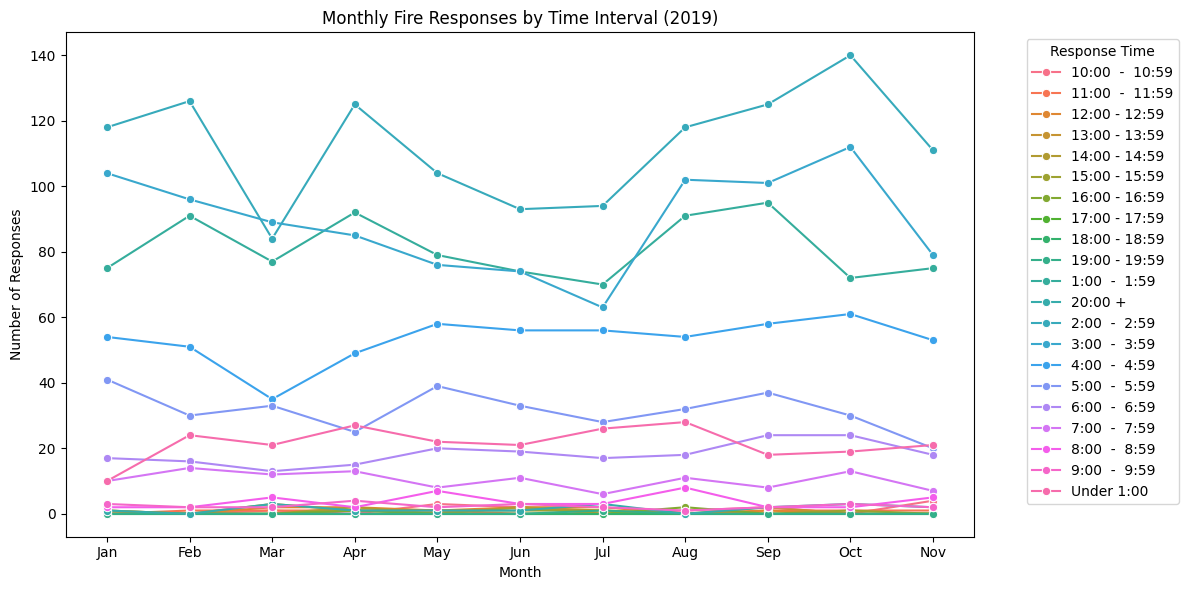

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Month", y="Count", hue="Response Times", data=df_long, marker="o")
plt.title("Monthly Fire Responses by Time Interval (2019)")
plt.xlabel("Month")
plt.ylabel("Number of Responses")
plt.legend(title="Response Time", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


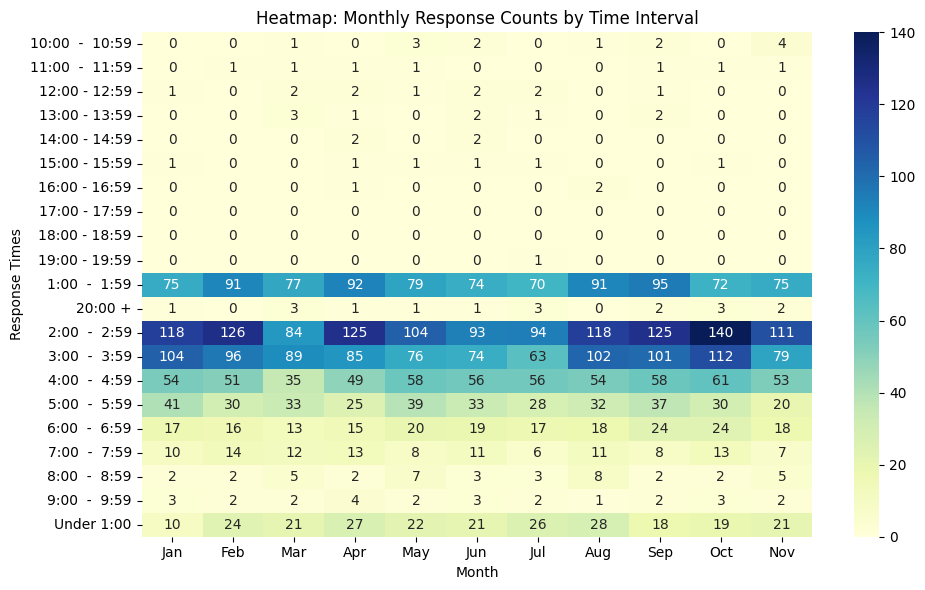

In [ ]:
pivot = df_long.pivot(index="Response Times", columns="Month", values="Count")
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap: Monthly Response Counts by Time Interval")
plt.tight_layout()
plt.show()


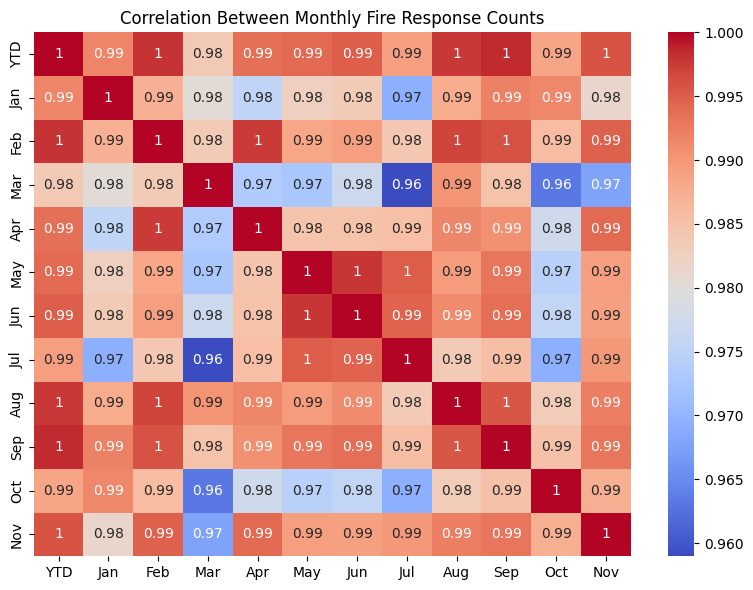

In [ ]:
# Drop non-numeric columns for correlation
numeric_df = df.drop(columns=["Response Times"])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Monthly Fire Response Counts")
plt.tight_layout()
plt.show()


In [ ]:
top_intervals = df.sort_values("YTD", ascending=False).head(3)
print("Top 3 Response Time Intervals by Total Responses:\n")
print(top_intervals[["Response Times", "YTD"]])


Top 3 Response Time Intervals by Total Responses:

  Response Times     YTD
2  2:00  -  2:59  1238.0
3  3:00  -  3:59   981.0
1  1:00  -  1:59   891.0


In [ ]:
df.to_csv("Cleaned_Fire_Response_Time_Analysis.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.


BACKWARD ELIMINATION METHOD

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load dataset
df = pd.read_csv("Cleaned_Fire_Response_Time_Analysis.csv")

# Select features (independent variables)
X = df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]
y = df['YTD']

# Add constant term for intercept
X = sm.add_constant(X)


In [ ]:
def backward_elimination(X, y, significance_level=0.05):
    """
    Performs backward elimination using p-values from OLS regression.
    """
    variables = list(X.columns)
    while len(variables) > 0:
        X_ols = X[variables]
        model = sm.OLS(y, X_ols).fit()
        p_values = model.pvalues
        max_p = p_values.max()
        if max_p > significance_level:
            excluded_var = p_values.idxmax()
            print(f"Removing '{excluded_var}' (p-value = {max_p:.4f})")
            variables.remove(excluded_var)
        else:
            break
    print("\n✅ Final Model Summary:")
    print(model.summary())
    return model, variables


In [ ]:
model, selected_features = backward_elimination(X, y)
print("\nSelected Features after Backward Elimination:")
print(selected_features)


Removing 'const' (p-value = 0.7224)

✅ Final Model Summary:
                                 OLS Regression Results                                
Dep. Variable:                    YTD   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.970e+29
Date:                Thu, 06 Nov 2025   Prob (F-statistic):                   1.14e-146
Time:                        09:05:07   Log-Likelihood:                          559.53
No. Observations:                  21   AIC:                                     -1097.
Df Residuals:                      10   BIC:                                     -1086.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      

In [ ]:
X_selected = X[selected_features]
final_model = sm.OLS(y, X_selected).fit()

print("\nFinal Model Summary:")
print(final_model.summary())



Final Model Summary:
                                 OLS Regression Results                                
Dep. Variable:                    YTD   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.970e+29
Date:                Thu, 06 Nov 2025   Prob (F-statistic):                   1.14e-146
Time:                        09:05:07   Log-Likelihood:                          559.53
No. Observations:                  21   AIC:                                     -1097.
Df Residuals:                      10   BIC:                                     -1086.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

Possible ML Algorithms:

Linear Regression
Decision Tree Regressor
Random Forest Regressor


For categorical encoding, Response Times could also be used as a feature after applying one-hot encoding.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load cleaned dataset
df = pd.read_csv("Cleaned_Fire_Response_Time_Analysis.csv")

# Ensure all months are numeric
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']
df[months] = df[months].apply(pd.to_numeric, errors='coerce').fillna(0)

# Classification Features (Months) and Target (Response Times)
X_clf = df[months]
y_clf = df['Response Times']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clf)

# Re-split after scaling
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_scaled, y_clf, test_size=0.2, random_state=42)

df.head()

,Response Times,YTD,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,Under 1:00,237.0,10.0,24.0,21.0,27.0,22.0,21.0,26.0,28.0,18.0,19.0,21.0
1,1:00 - 1:59,891.0,75.0,91.0,77.0,92.0,79.0,74.0,70.0,91.0,95.0,72.0,75.0
2,2:00 - 2:59,1238.0,118.0,126.0,84.0,125.0,104.0,93.0,94.0,118.0,125.0,140.0,111.0
3,3:00 - 3:59,981.0,104.0,96.0,89.0,85.0,76.0,74.0,63.0,102.0,101.0,112.0,79.0
4,4:00 - 4:59,585.0,54.0,51.0,35.0,49.0,58.0,56.0,56.0,54.0,58.0,61.0,53.0


In [ ]:
# Ensure all months are numeric
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']
df[months] = df[months].apply(pd.to_numeric, errors='coerce').fillna(0)

# Regression Features (Months) and Target (YTD)
X_reg = df[months]
y_reg = df['YTD']

# Classification Features (Months) and Target (Response Times)
X_clf = df[months]
y_clf = df['Response Times']

# Split datasets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


Linear Regression


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_lr = lin_reg.predict(X_test_reg)

print("🔹 Linear Regression")
print("R² Score:", r2_score(y_test_reg, y_pred_lr))
print("MSE:", mean_squared_error(y_test_reg, y_pred_lr))


🔹 Linear Regression
R² Score: 1.0
MSE: 4.680785067219396e-27


Decision tree Regressor

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_dt = dt_reg.predict(X_test_reg)

print("\n🔹 Decision Tree Regression")
print("R² Score:", r2_score(y_test_reg, y_pred_dt))
print("MSE:", mean_squared_error(y_test_reg, y_pred_dt))



🔹 Decision Tree Regression
R² Score: 0.9746561230764954
MSE: 2917.8


Random Forest

In [ ]:
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)

print("\n🔹 Random Forest Regression")
print("R² Score:", r2_score(y_test_reg, y_pred_rf))
print("MSE:", mean_squared_error(y_test_reg, y_pred_rf))



🔹 Random Forest Regression
R² Score: 0.994282990296052
MSE: 658.1901800000004


CLASSIFICATION


KNN


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_clf, y_train_clf)
y_pred_knn = knn.predict(X_test_clf)

print("\n🔹 KNN Classification")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_knn))
print(classification_report(y_test_clf, y_pred_knn))



🔹 KNN Classification
Accuracy: 0.0
                 precision    recall  f1-score   support

10:00  -  10:59       0.00      0.00      0.00       0.0
  14:00 - 14:59       0.00      0.00      0.00       0.0
  15:00 - 15:59       0.00      0.00      0.00       1.0
  16:00 - 16:59       0.00      0.00      0.00       0.0
  17:00 - 17:59       0.00      0.00      0.00       1.0
  1:00  -  1:59       0.00      0.00      0.00       1.0
  2:00  -  2:59       0.00      0.00      0.00       0.0
  5:00  -  5:59       0.00      0.00      0.00       0.0
  8:00  -  8:59       0.00      0.00      0.00       1.0
     Under 1:00       0.00      0.00      0.00       1.0

       accuracy                           0.00       5.0
      macro avg       0.00      0.00      0.00       5.0
   weighted avg       0.00      0.00      0.00       5.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train_clf, y_train_clf)
y_pred_nb = nb.predict(X_test_clf)

print("\n🔹 Naive Bayes Classification")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_nb))
print(classification_report(y_test_clf, y_pred_nb))



🔹 Naive Bayes Classification
Accuracy: 0.0
               precision    recall  f1-score   support

15:00 - 15:59       0.00      0.00      0.00       1.0
17:00 - 17:59       0.00      0.00      0.00       1.0
18:00 - 18:59       0.00      0.00      0.00       0.0
19:00 - 19:59       0.00      0.00      0.00       0.0
1:00  -  1:59       0.00      0.00      0.00       1.0
3:00  -  3:59       0.00      0.00      0.00       0.0
6:00  -  6:59       0.00      0.00      0.00       0.0
8:00  -  8:59       0.00      0.00      0.00       1.0
9:00  -  9:59       0.00      0.00      0.00       0.0
   Under 1:00       0.00      0.00      0.00       1.0

     accuracy                           0.00       5.0
    macro avg       0.00      0.00      0.00       5.0
 weighted avg       0.00      0.00      0.00       5.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

CLASSIFICATION WITH CROSS VALIDATION


In [ ]:
# ===============================
# 🔥 FIRE RESPONSE TIME ANALYSIS (with Cross-Validation)
# Models: KNN, Gradient Boosting, Naive Bayes
# ===============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# 1️⃣ Load dataset
df = pd.read_csv("/content/Cleaned_Fire_Response_Time_Analysis.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace("\n", "", regex=True)

# Auto-detect the response time category column
month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","YTD"]
id_col = [c for c in df.columns if c not in month_names][0]
print(f"✅ Detected ID column: {id_col}")

# 2️⃣ Convert to long format
df_long = df.melt(id_vars=[id_col], var_name="Month", value_name="Count")

# Remove YTD (year-to-date total)
df_long = df_long[df_long["Month"] != "YTD"]

# Map month names to numbers
month_map = {m: i for i, m in enumerate(
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], start=1)}
df_long["MonthNum"] = df_long["Month"].map(month_map)

# Handle missing data
df_long = df_long.dropna(subset=["Count", "MonthNum"])

# 3️⃣ Create binary target
threshold = df_long["Count"].median()
df_long["HighCount"] = (df_long["Count"] > threshold).astype(int)

# 4️⃣ Encode features
X = pd.get_dummies(df_long[[id_col, "MonthNum"]], drop_first=True).fillna(0)
y = df_long["HighCount"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Set up 5-Fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ================================
# 🟢 1. KNN Classifier
# ================================
knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn, X_scaled, y, cv=kfold, scoring='accuracy')
print("\n🔹 KNN Classifier Cross-Validation 🔹")
print(f"Fold Accuracies: {knn_scores}")
print(f"Mean Accuracy: {knn_scores.mean():.4f}")

# ================================
# 🟠 2. Gradient Boosting Classifier
# ================================
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_scores = cross_val_score(gb, X_scaled, y, cv=kfold, scoring='accuracy')
print("\n🔹 Gradient Boosting Cross-Validation 🔹")
print(f"Fold Accuracies: {gb_scores}")
print(f"Mean Accuracy: {gb_scores.mean():.4f}")

# ================================
# 🔵 3. Naive Bayes Classifier
# ================================
nb = GaussianNB()
nb_scores = cross_val_score(nb, X_scaled, y, cv=kfold, scoring='accuracy')
print("\n🔹 Naive Bayes Cross-Validation 🔹")
print(f"Fold Accuracies: {nb_scores}")
print(f"Mean Accuracy: {nb_scores.mean():.4f}")

# ================================
# 📊 Summary Comparison
# ================================
summary = pd.DataFrame({
    'Model': ['KNN', 'Gradient Boosting', 'Naive Bayes'],
    'Mean Accuracy': [knn_scores.mean(), gb_scores.mean(), nb_scores.mean()]
})
print("\n===============================")
print("📈 Cross-Validation Summary")
print(summary)
print("===============================")

✅ Detected ID column: Response Times

🔹 KNN Classifier Cross-Validation 🔹
Fold Accuracies: [0.91489362 0.95652174 0.89130435 0.89130435 0.91304348]
Mean Accuracy: 0.9134

🔹 Gradient Boosting Cross-Validation 🔹
Fold Accuracies: [0.91489362 0.93478261 0.89130435 0.91304348 0.93478261]
Mean Accuracy: 0.9178

🔹 Naive Bayes Cross-Validation 🔹
Fold Accuracies: [0.82978723 0.89130435 0.84782609 0.91304348 0.95652174]
Mean Accuracy: 0.8877

📈 Cross-Validation Summary
               Model  Mean Accuracy
0                KNN       0.913414
1  Gradient Boosting       0.917761
2        Naive Bayes       0.887697
